## Importation of Libraries

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pathlib import Path
import re

### Knowing the target column Categories

In [98]:
## Specifying the path for target columns
input_dir = Path("../bbc/")

## Saving the target class categories in the categories column
categories = [category.name for category in input_dir.iterdir() if category.is_dir()]
categories

['business', 'entertainment', 'politics', 'sport', 'tech']

In [99]:
X=[]
y=[]
for cat in categories:
    for feature_path in (input_dir/cat).iterdir():
        if feature_path.is_file():
            #Storing the category label
            y.append(cat)
            #storing the text features
            X.append(open(feature_path,encoding="utf8", errors='ignore').read())

In [100]:
data=pd.DataFrame({
    "text":X,
    "label":y
})

In [101]:
data.head()

,text,label
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [102]:
data.shape

(2225, 2)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   label   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [104]:
data['label'].value_counts()

label
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

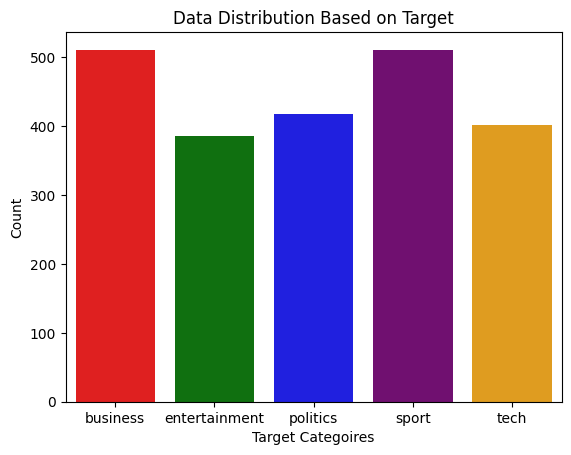

In [105]:
sns.countplot(x='label',data=data,palette=['red','green','blue','purple','orange'],hue='label')
plt.title("Data Distribution Based on Target")
plt.xlabel("Target Categoires")
plt.ylabel("Count")
plt.show()

In [106]:
data.isna().sum()

text     0
label    0
dtype: int64

In [107]:
data.duplicated().sum()

98

In [108]:
data.drop_duplicates(keep=False,inplace=True)

In [109]:
data.duplicated().sum()

0

In [110]:
from wordcloud import WordCloud

In [111]:
def frequency_words(text):
  words_count=[]
  for word in text.split():
    words_count.extend(word)
  #Generating word frequences using value_counts in word-list
  word_freq=pd.Series(words_count).value_counts()
  word_freq[:100]#displaying top 100 words
  return word_freq

In [112]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [113]:
freq=frequency_words(data.text.str)
freq

the             40752
to              22540
of              17947
and             16240
a               15731
                ...  
infiltrating        1
ring.               1
Brave,              1
snuff               1
LOL                 1
Name: count, Length: 63872, dtype: int64

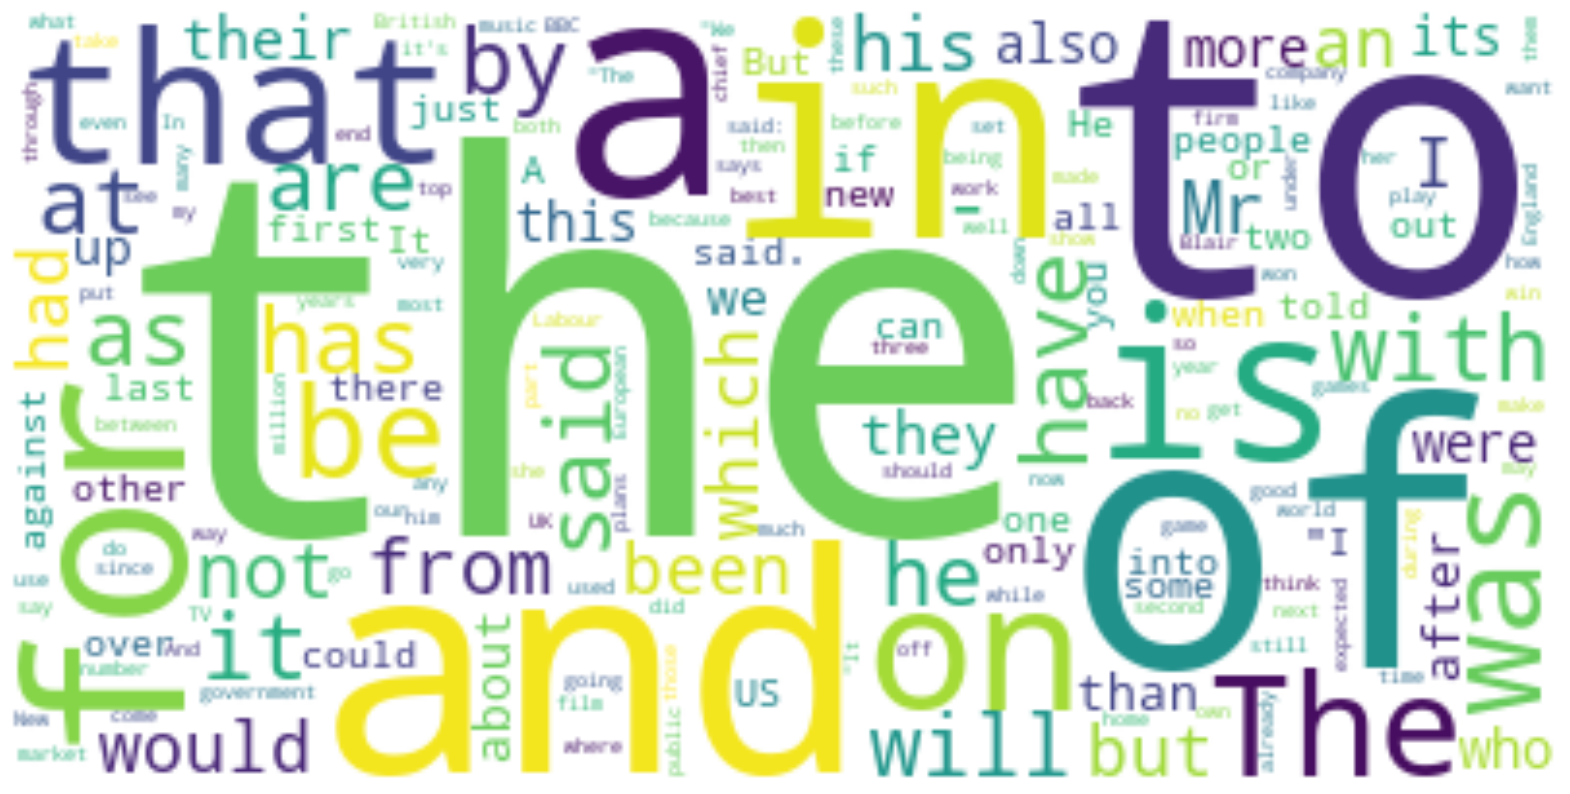

In [114]:
plt.figure(figsize=(20,20))
wordc=WordCloud(max_words=200,width=400,height=200,background_color='white').generate_from_frequencies(freq)
plt.axis('off')
plt.imshow(wordc,interpolation='bilinear')
plt.show()

In [115]:
def cleaner_text(text):
  #removing the html tags
  text=re.sub(r"\n"," ",text)
  return text

In [116]:
data['text']=data['text'].apply(cleaner_text)

In [117]:
def html_cleaner(text):
  #removing the html tags
  text=re.sub(r"<.*?>"," ",text)
  return text

In [118]:
data['text']=data['text'].apply(html_cleaner)

In [119]:
def remove_marks(text):
  text=re.sub(r"[!\"#$%&\\'()*+,-\.\/:;<=>\?\]\^_\`{\|}\]\0-9]+"," ",text)
  return text

In [120]:
data['text']=data['text'].apply(remove_marks)

In [121]:
def remove_whites(text):
  text=re.sub("(\'s)|([`'])+"," ",text)
  return text

In [122]:
data['text']=data['text'].apply(remove_whites)

In [123]:
dd={
    "US":'united states',
    "UK":'united kingdom',
    "BA":'British Airways',
    "D":'had',
    "S":'is',
    "LL":'will',
    "VE":'have',
    "M":'am',
    "U":'you',
    "T":'not',
    "COULDN":'could',
    "SHOULDN":'should',
    "WOULDN":'would',
    "DIDN":'did',
    "DON":'do',
    "DOESN":'does',
    "AREN":'are',
    "WASN":'was',
    "AIN":'is',
    "ISN":'is',
    'TKTS':'tickets',
    'USF':'useful',
    'C':'see',
    'U':'you',
    "M":'am',
    "VE":'have',
    "LL":'will',
    "T":'not',
    "RE":'are',
    '1':'one',
    '2':'two',
    '3':'three',
    '4':'four',
    '5':'five',
    '6':'six',
    '7':'seven',
    '8':'eight',
    '9':'nine',
    '10':'ten',
    'ND':'second',
     "MG":'milligram',
     "XS":"times",
    "X":"times",

}
def chat_treatment(text):
    new_text=[]
    for word in text.split():
        if len(word)>1:
            if word.upper() in dd.keys():
                new_text.append(dd[word.upper()])
            else:
                new_text.append(word)
    return " ".join(new_text)

In [124]:
data['text']=data['text'].apply(chat_treatment)

In [125]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [126]:
from nltk.corpus import stopwords
from nltk import word_tokenize
stops=stopwords.words('english')

In [127]:
def remove_stop_words(text):
  my_text=[]
  #lower-casing
  text=text.lower()
  tokens=word_tokenize(text)
  for word in tokens:
    if word not in stops:
      my_text.append(word)
  return " ".join(my_text)

In [128]:
data['text']=data['text'].apply(remove_stop_words)

In [129]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [130]:
def lemmatization_text(text):
  my_text=[]
  doc=nlp(text)
  for token in doc:
    my_text.append(token.lemma_)
  return " ".join(my_text)

In [131]:
data['text']=data['text'].apply(lemmatization_text)

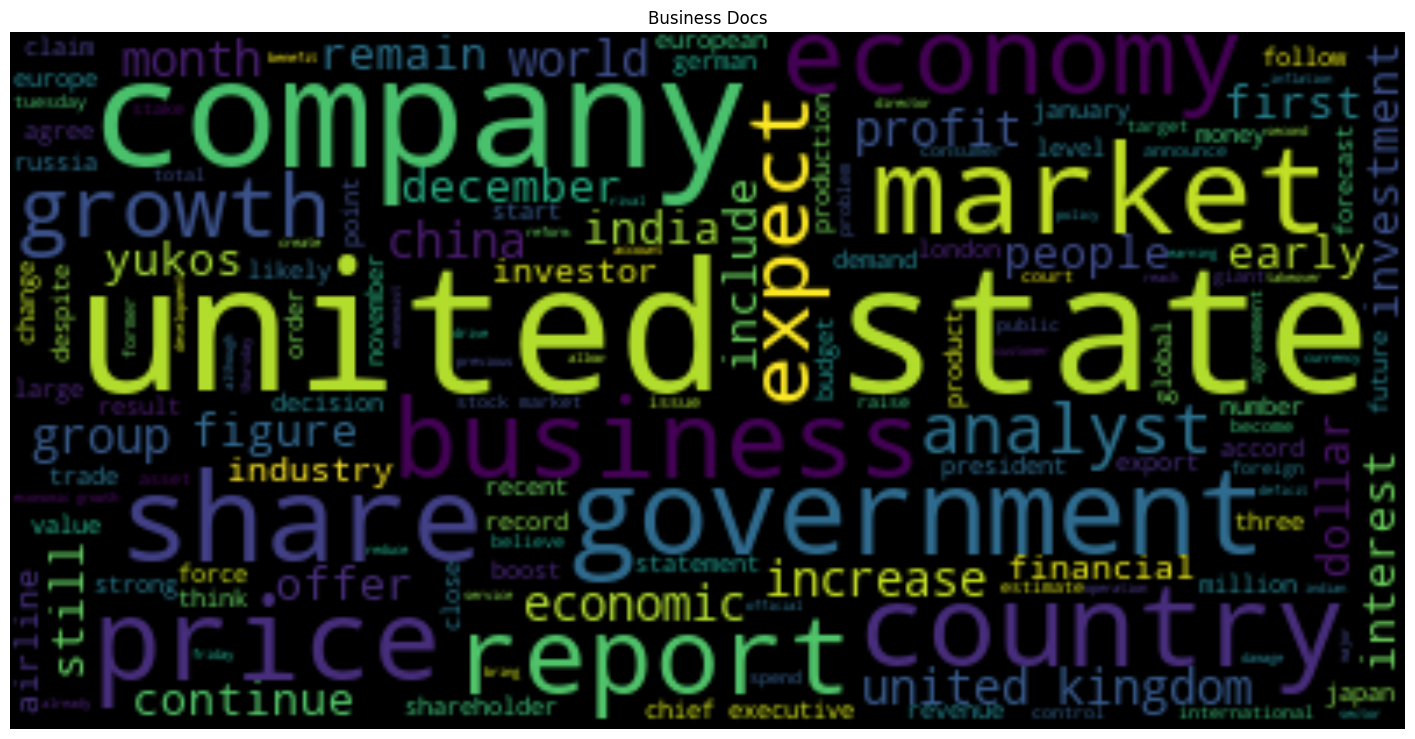

In [132]:
plt.figure(figsize=(18,18))
WordCld=WordCloud(max_words=500,width=400,height=200,min_word_length=5).generate(" ".join(data[data.label=='business'].text))
plt.title('Business Docs')
plt.axis('off')
plt.imshow(WordCld,interpolation='bilinear')
plt.show()

In [133]:
data['label']=data['label'].map(
    {
        'business':0,
     'entertainment':1,
     'politics':2,
     'sport':3,
     'tech':4
        }
    )

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['text'],data['label'],test_size=0.2,
                                               stratify=data['label'],random_state=42)

In [136]:
tfidf = TfidfVectorizer(ngram_range=(1,5),max_df=0.95, max_features=15000)


tfidf_train = tfidf.fit_transform(x_train)
tfidf_test = tfidf.transform(x_test)

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
lr=LogisticRegression()

In [139]:
lr.fit(tfidf_train,y_train)

LogisticRegression()

In [142]:
y_pred=lr.predict(tfidf_test)

In [143]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [144]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[98,  1,  0,  0,  0],
       [ 0, 69,  1,  0,  0],
       [ 2,  0, 76,  0,  0],
       [ 1,  0,  0, 99,  0],
       [ 1,  0,  0,  1, 57]], dtype=int64)

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Bidirectional,Dense,SpatialDropout1D,Embedding,GRU
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [43]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(data['text'])

### Vocabulary size

In [44]:
vocabulary_size=len(tokenizer.word_index)+1

In [45]:
vocabulary_size

22522

### Converting text to sequences

In [47]:
seq=tokenizer.texts_to_sequences(data.text)

In [48]:
num_tokens=[len(sentence)for sentence in seq]
num_tokens=np.array(num_tokens)

In [49]:
num_tokens

array([ 250,  235,  161, ...,  547,  228, 1469])

#### Length of maximum documet

In [50]:
max(num_tokens)

2220

### Length of review to keep

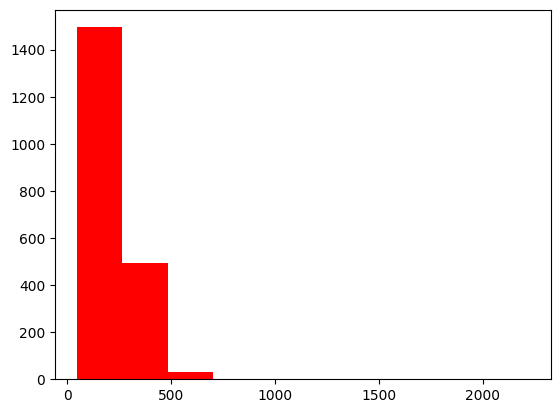

In [52]:
train_lens = [len(str(i).split()) for i in seq]
plt.hist(train_lens,color='red')
plt.show()

after analyzing the plot shown above it can be seen that length of most of the reviews is around 350

In [57]:
max_tokens=350

#### Making input size fixed

In [59]:
padded_seq=pad_sequences(seq,padding='post',maxlen=max_tokens)

In [79]:
data['label']=data['label'].map(
    {
        'business':0,
     'entertainment':1,
     'politics':2,
     'sport':3,
     'tech':4
        }
    )

### **Splitting the data into train and test**

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(padded_seq,data['label'],test_size=0.2,
                                               stratify=data['label'],random_state=42)

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [140]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(1623,)
(1623,)
(406,)
(406,)


## **Building Model**

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,LSTM,Bidirectional,Dropout

In [84]:
model=Sequential()
model.add(Embedding(input_dim=vocabulary_size,output_dim=100,input_length=max_tokens))
model.add(LSTM(100,activation='relu',return_sequences=True))
model.add(LSTM(64,activation='relu',return_sequences=False))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [85]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=10,verbose=1)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 18s 308ms/step - accuracy: 0.2703 - loss: 1.5931 - val_accuracy: 0.2393 - val_loss: 1.5428
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 0.2777 - loss: nan - val_accuracy: 0.2025 - val_loss: nan
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 373ms/step - accuracy: 0.2630 - loss: nan - val_accuracy: 0.2025 - val_loss: nan
Epoch 4/10
35/46 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step - accuracy: 0.2561 - loss: nan

KeyboardInterrupt: 